In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [4]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [79]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
predicted                14999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


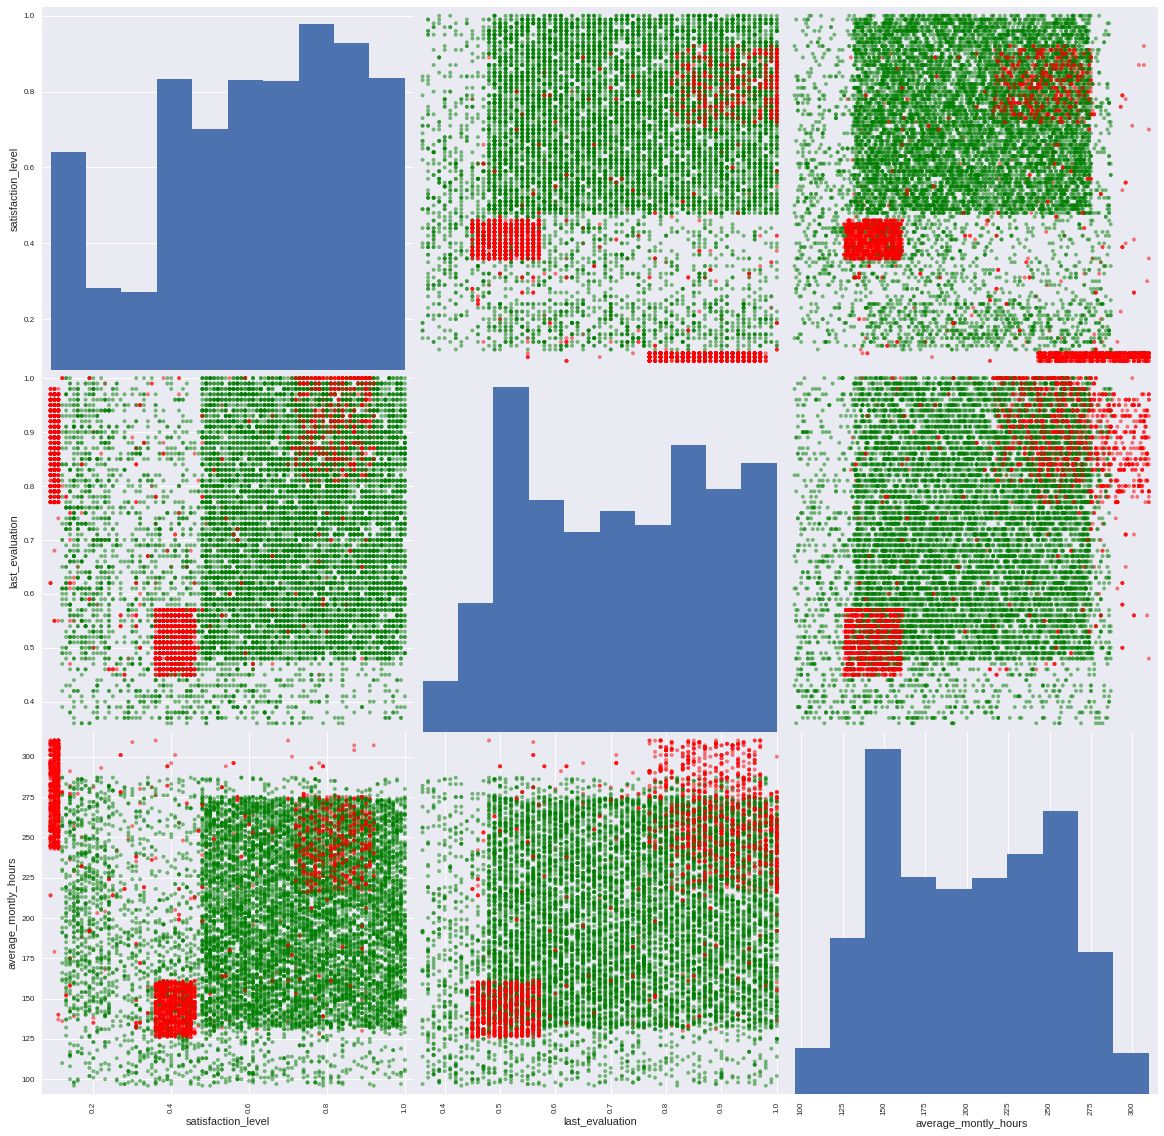

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# import the scatter_matrix functionality
from pandas.tools.plotting import scatter_matrix

# define colors list, to be used to plot survived either red (=0) or green (=1)
colors=['green','red']

# make a scatter plot
df_numeric = df[['satisfaction_level','last_evaluation','average_montly_hours']]
scatter_matrix(df_numeric,figsize=[20,20],marker='.',c=df.left.apply(lambda x:colors[x]))

df.info()

In [6]:
left = df[df['left'] == 1]
stayed = df[df['left'] == 0]

In [144]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [87]:
left.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [125]:
stayed.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


In [158]:
stayed_summary = pd.DataFrame(stayed.describe())
left_summary = pd.DataFrame(left.describe())
mean_stayed = stayed_summary.iloc[1]
mean_left = left_summary.iloc[1]
#pd.mean_stayed
means = pd.concat([mean_stayed,mean_left],axis=1)
means.columns = ['stayed','left']
means

,stayed,left
satisfaction_level,0.666810,0.440098
last_evaluation,0.715473,0.718113
number_project,3.786664,3.855503
average_montly_hours,199.060203,207.419210
time_spend_company,3.380032,3.876505
Work_accident,0.175009,0.047326
left,0.000000,1.000000
promotion_last_5years,0.026251,0.005321


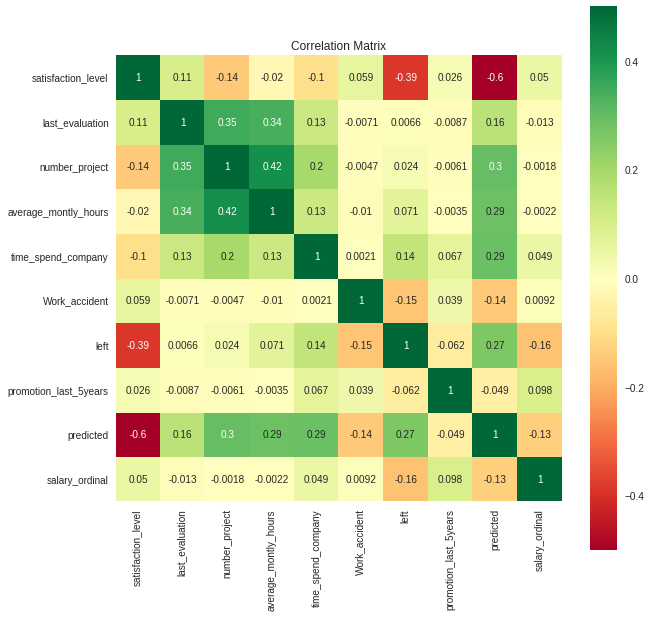

In [201]:
#changed the gradiation
correlations = df.corr()
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(correlations,vmin=-.4,vmax=.5,square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation Matrix')

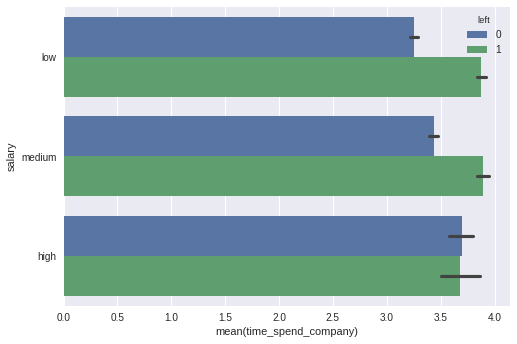

In [9]:
sns.barplot(x="time_spend_company", y="salary",hue="left", data=df)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

/home/dsci/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


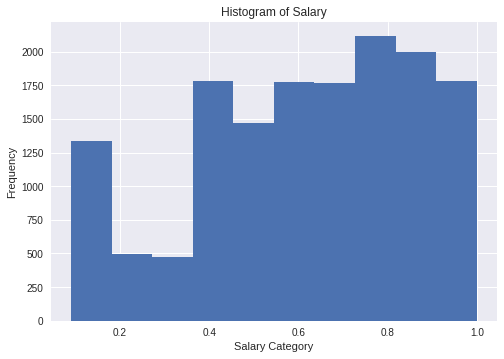

In [15]:
# histogram of education
df.satisfaction_level.hist()
plt.title('Histogram of Salary')
plt.xlabel('Salary Category')
plt.ylabel('Frequency')

## Cleaning

In [190]:
df['salary_ordinal'] = df['salary']
df['salary_ordinal'] = df['salary_ordinal'].replace('low',0)
df['salary_ordinal'] = df['salary_ordinal'].replace('medium',1)
df['salary_ordinal'] = df['salary_ordinal'].replace('high',2)
df[[9,11]].head()

,salary,salary_ordinal
0,low,0
1,medium,1
2,medium,1
3,low,0
4,low,0


In [165]:
#what didnt work
if df[df['salary'] == 'low']:
    df['salary_ordinal'] = 0
elif df[df['salary'] == 'medium']:
    df['salary_ordinal'] = 1
elif df[df['salary'] == 'high']:
    df['salary_ordinal'] = 2

df

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [90]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# load the iris datasets
features = ['satisfaction_level','satisfaction_level','last_evaluation','number_project',
            'average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']
#output_df = df[['left']]
X,y = df[features],df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(len(X_train))
print(len(X_test))
3750/(3750+11249)

11249
3750


0.25001666777785186

In [91]:
# fit a logistic regression model to the data
model = LogisticRegression(fit_intercept=False)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
coef = pd.DataFrame(np.transpose(model.coef_))
coef.columns = ['coefficients']
coef.index = features
coef

,coefficients
satisfaction_level,-2.009112
satisfaction_level,-2.009112
last_evaluation,0.774820
number_project,-0.296261
average_montly_hours,0.004692
time_spend_company,0.240505
Work_accident,-1.419920
promotion_last_5years,-1.533047


In [114]:
from sklearn.metrics import confusion_matrix
# make predictions
expected = y_test
df['predicted'] = model.predict(X)
predicted = model.predict(X_test)
# summarize the fit of the model
pd.DataFrame(confusion_matrix(expected, predicted))

,0,1
0,2651,230
1,650,219


missing categorical variables(salary and sales)

In [192]:
#running the logistic with salary
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# load the iris datasets
features = ['satisfaction_level','satisfaction_level','last_evaluation','number_project',
            'average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary_ordinal']
#output_df = df[['left']]
X,y = df[features],df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LogisticRegression(fit_intercept=False)
model.fit(X_train, y_train)
coef = pd.DataFrame(np.transpose(model.coef_))
coef.columns = ['coefficients']
coef.index = features
coef
from sklearn.metrics import confusion_matrix
# make predictions
expected = y_test
df['predicted'] = model.predict(X)
predicted = model.predict(X_test)
# summarize the fit of the model
pd.DataFrame(confusion_matrix(expected, predicted))

,0,1
0,2661,220
1,634,235


In [109]:
#just a different package
from statsmodels.formula.api import logit
affair_mod = logit(("left ~ satisfaction_level+last_evaluation+number_project+"
                   "average_montly_hours+time_spend_company+Work_accident+promotion_last_5years"), df).fit()

Optimization terminated successfully.
         Current function value: 0.444362
         Iterations 7


In [110]:
print(affair_mod.summary())

                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14991
Method:                           MLE   Df Model:                            7
Date:                Wed, 15 Mar 2017   Pseudo R-squ.:                  0.1904
Time:                        22:35:49   Log-Likelihood:                -6665.0
converged:                       True   LL-Null:                       -8232.3
                                        LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.2240      0.117      1.915      0.055        -0.005     0.453
satisfaction_level       -4.1234      0.096    -42.731      0.000        -4.312    -3.934
last_eva

In [111]:
affair_mod.pred_table()

array([[ 10581.,    847.],
       [  2670.,    901.]])

In [99]:
model.fit_intercept

False

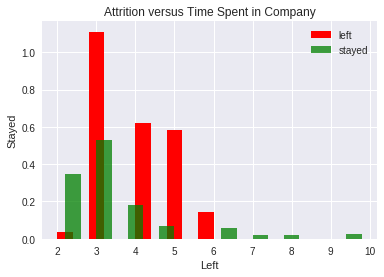

In [154]:
plt.hist(left['time_spend_company'],bins=10,normed=1,color='red',label='left')
plt.hist(stayed['time_spend_company'],bins=10,rwidth=.5,normed=1,alpha=0.75,color='green',label='stayed')
plt.title("Attrition versus Time Spent in Company")
plt.xlabel("Left")
plt.ylabel("Stayed")
plt.legend()
plt.show()

Although it doesnt appear the number of individuals leave the longer they are at the agency, it does seem theey're both skewed right which might imply employees typically dont work there longer than 6 years or less.